In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("fivethirtyeight")

file_path = r"C:\Users\User\BA Projects\Credit-Fraud-Detection\Data\creditcard.csv"
df = pd.read_csv(file_path)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
display(df.head())

print("\nMissing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

print("\nClass distribution:")
print(df['Class'].value_counts())

Rows: 284807, Columns: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Class distri

In [14]:
def reduce_memory(df):
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

before = df.memory_usage(deep=True).sum() / 1024**2
df = reduce_memory(df)
after = df.memory_usage(deep=True).sum() / 1024**2

print(f"Memory usage reduced from {before:.2f} MB to {after:.2f} MB.")

Memory usage reduced from 67.36 MB to 33.95 MB.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

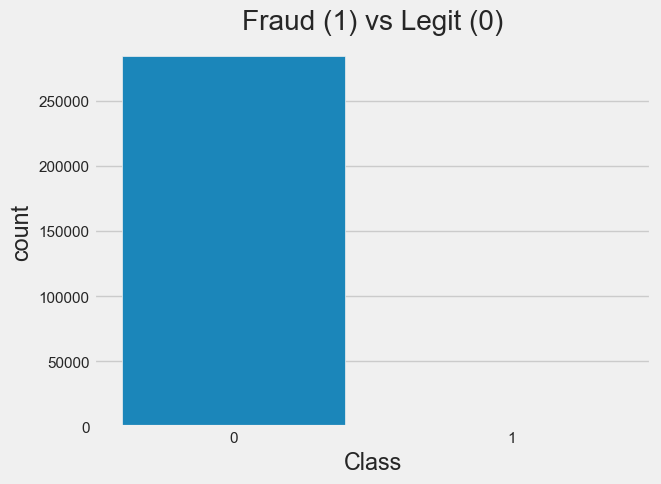

Fraudulent transactions: 0.1727%


In [18]:
1

sns.countplot(x='Class', data=df)
plt.title('Fraud (1) vs Legit (0)')
plt.show()

fraud_percent = df['Class'].mean() * 100
print(f"Fraudulent transactions: {fraud_percent:.4f}%")

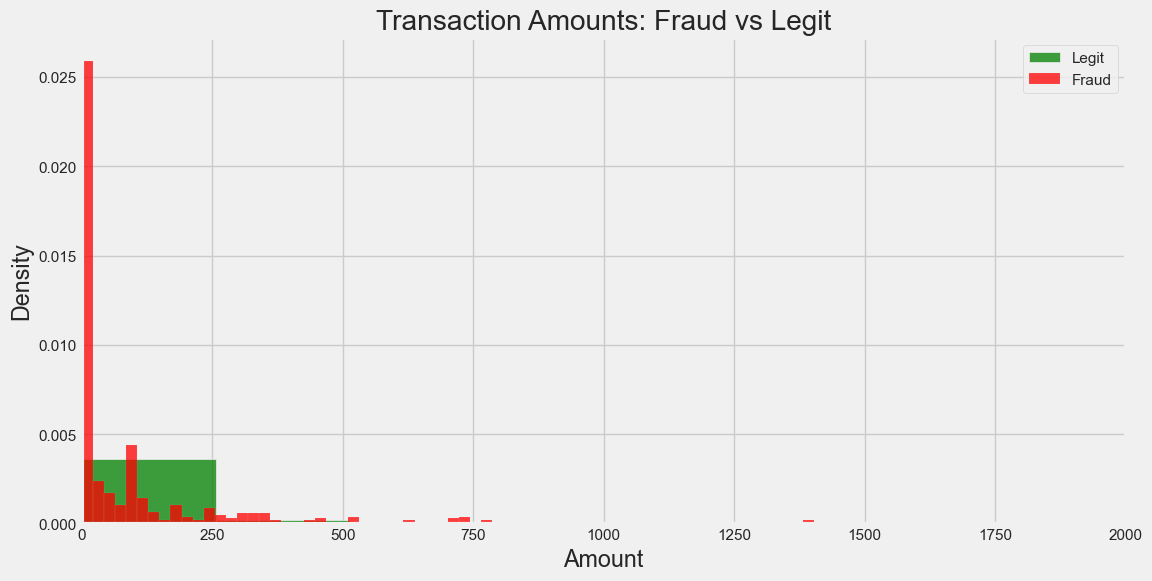

In [17]:
2

plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='green', label='Legit', stat='density')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', stat='density')
plt.legend()
plt.title('Transaction Amounts: Fraud vs Legit')
plt.xlim(0, 2000)  # Optional: limit extreme outliers
plt.show()

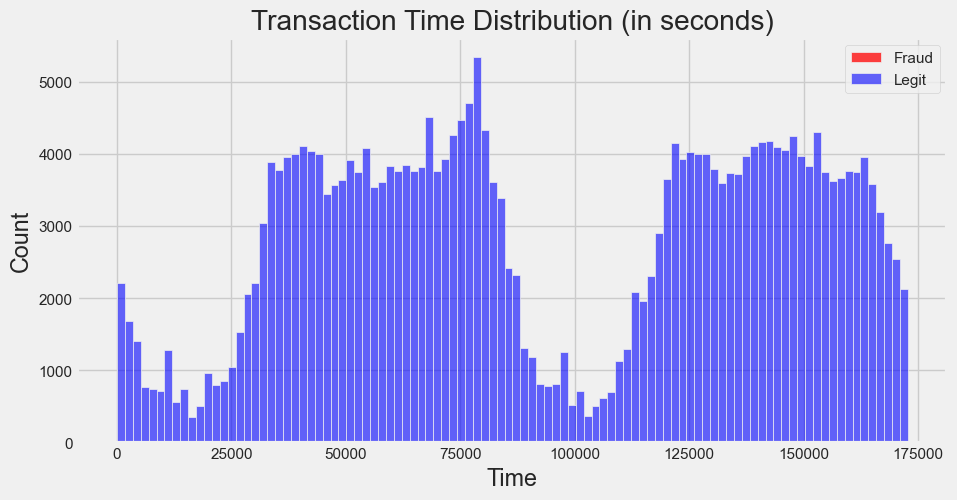

In [19]:
3

plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='red', label='Fraud')
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, color='blue', label='Legit', alpha=0.6)
plt.legend()
plt.title('Transaction Time Distribution (in seconds)')
plt.show()


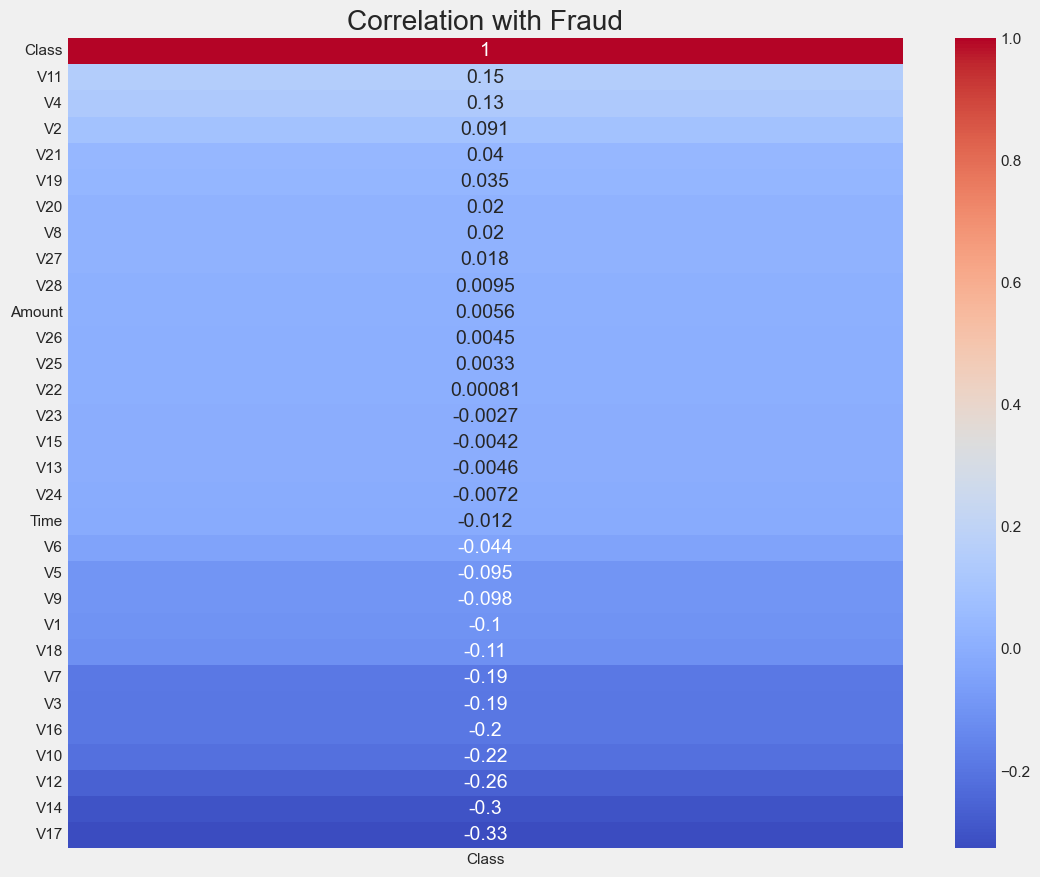

In [20]:
4

plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Fraud')
plt.show()


In [22]:
#Creating a Model

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 227845
Test samples: 56962


In [23]:
train_df = pd.concat([X_train, y_train], axis=1)

fraud = train_df[train_df['Class'] == 1]
legit = train_df[train_df['Class'] == 0].sample(len(fraud), random_state=42)

balanced_train = pd.concat([fraud, legit])
X_train_bal = balanced_train.drop(columns=['Class'])
y_train_bal = balanced_train['Class']

print(f"Balanced samples: {len(y_train_bal)}")

Balanced samples: 788


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9656    0.9824     56864
           1     0.0445    0.9286    0.0849        98

    accuracy                         0.9656     56962
   macro avg     0.5222    0.9471    0.5337     56962
weighted avg     0.9982    0.9656    0.9809     56962



In [30]:
import joblib
joblib.dump(model, 'credit_fraud_model.pkl')

['credit_fraud_model.pkl']